<a href="https://colab.research.google.com/github/blbt123/TIS/blob/main/HomeWork_2023_02_20_%EC%9E%84%EC%9E%AC%EA%B4%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm


!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()

mpl.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum-extra.
(Reading database ... 129496 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-extra_20180306-3_all.deb ...
Unpacking fonts-nanum-extra (20180306-3) ...
Selecting previously unselected package fonts-nanum.
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-2_all.deb ...
Unpacking fonts-nanum-coding (2.5-2) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Setting up fonts-nanum-extra (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Setting up fonts-nanum-coding (2.5-2) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...
NanumBarunGothic


In [1]:
import numpy as np
import pandas as pd

In [3]:
# 1. 구글드라이브 마운트 후 파일 불러와서 판다스 데이터프레임으로 저장하시오.
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/인천광역시 서구_공동주택 실거래가_20220531.csv", encoding = 'euc-kr')
df

,행정구역,단지명,합계동호수(건),합계면적(제곱미터),합계금액(백만원),산출기간,기준일자
0,백석동,검암역 로열파크씨티 푸르지오 1단지,3.0,218.78,1654.0,최근1년,2022-05-31
1,백석동,검암역 로열파크씨티 푸르지오 2단지,4.0,331.87,2461.0,최근1년,2022-05-31
2,백석동,기타,2.0,116.49,0.0,최근1년,2022-05-31
3,검암동,검암2차신명스카이뷰,1.0,84.97,400.0,최근1년,2022-05-31
4,검암동,검암마젤란21아파트,1.0,84.59,540.0,최근1년,2022-05-31
...,...,...,...,...,...,...,...
451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
452,NaN,NaN,NaN,NaN,NaN,NaN,NaN
453,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 2. 결측치를 포함한 행의 개수를 산출하시오.
len(df)

456

In [4]:
# 3. '기준일자' 칼럼을 활용하여 '연도', '월'이라는 새로운 칼럼을 생성하시오.
df[["연도","월","일"]] = df["기준일자"].str.split("-", expand=True)
df.drop("일",axis=1,inplace=True)
df

,행정구역,단지명,합계동호수(건),합계면적(제곱미터),합계금액(백만원),산출기간,기준일자,연도,월
0,백석동,검암역 로열파크씨티 푸르지오 1단지,3.0,218.78,1654.0,최근1년,2022-05-31,2022,05
1,백석동,검암역 로열파크씨티 푸르지오 2단지,4.0,331.87,2461.0,최근1년,2022-05-31,2022,05
2,백석동,기타,2.0,116.49,0.0,최근1년,2022-05-31,2022,05
3,검암동,검암2차신명스카이뷰,1.0,84.97,400.0,최근1년,2022-05-31,2022,05
4,검암동,검암마젤란21아파트,1.0,84.59,540.0,최근1년,2022-05-31,2022,05
...,...,...,...,...,...,...,...,...,...
451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 4. '푸르지오'라는 아파트 브랜드명이 들어간 아파트 정보만 추출하시오.
dfpr = df[df['단지명'].str.contains('푸르지오', na=False)]
dfpr

,행정구역,단지명,합계동호수(건),합계면적(제곱미터),합계금액(백만원),산출기간,기준일자,연도,월
0,백석동,검암역 로열파크씨티 푸르지오 1단지,3.0,218.78,1654.0,최근1년,2022-05-31,2022,05
1,백석동,검암역 로열파크씨티 푸르지오 2단지,4.0,331.87,2461.0,최근1년,2022-05-31,2022,05
128,당하동,당하푸르지오,2.0,169.89,877.0,최근1년,2022-05-31,2022,05
191,청라동,청라푸르지오아파트,1.0,114.10,1130.0,최근1년,2022-05-31,2022,05


In [6]:
# 5. 합계면적(제곱미터)이 100 이상인 새로운 칼럼을 생성하시오.
df["합계면적<=100"] = df["합계면적(제곱미터)"]<=100
df

,행정구역,단지명,합계동호수(건),합계면적(제곱미터),합계금액(백만원),산출기간,기준일자,연도,월,합계면적<=100
0,백석동,검암역 로열파크씨티 푸르지오 1단지,3.0,218.78,1654.0,최근1년,2022-05-31,2022,05,False
1,백석동,검암역 로열파크씨티 푸르지오 2단지,4.0,331.87,2461.0,최근1년,2022-05-31,2022,05,False
2,백석동,기타,2.0,116.49,0.0,최근1년,2022-05-31,2022,05,False
3,검암동,검암2차신명스카이뷰,1.0,84.97,400.0,최근1년,2022-05-31,2022,05,True
4,검암동,검암마젤란21아파트,1.0,84.59,540.0,최근1년,2022-05-31,2022,05,True
...,...,...,...,...,...,...,...,...,...,...
451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [7]:
# 6. 행정구역'과 '합계금액(백만원) '칼럼을 활용하여 동별 합계금액의 평균을 구하고(groupby 활용할 것!), (막대그래프 등으로) 시각화하시오.(한글 제목 및 label 값 표시할 것)

dfmean = df.groupby("행정구역")["합계금액(백만원)"].mean()



In [18]:
# 6번 첫번째 결과
dfmean

행정구역
가정동     1455.357143
가좌동      385.444444
검암동      474.375000
경서동      660.000000
공촌동      235.000000
금곡동      656.500000
당하동    14173.473684
대곡동      100.000000
마전동      512.080000
백석동     1371.666667
불로동    24593.357143
석남동      288.538462
신현동      995.500000
심곡동      452.142857
연희동      258.600000
오류동      854.000000
왕길동      625.333333
원당동     1168.888889
청라동     1343.000000
Name: 합계금액(백만원), dtype: float64

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [18]:
import matplotlib
import platform

print(platform.system()) # 플랫폼 확인

# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

Linux


<function matplotlib.pyplot.show(*args, **kw)>

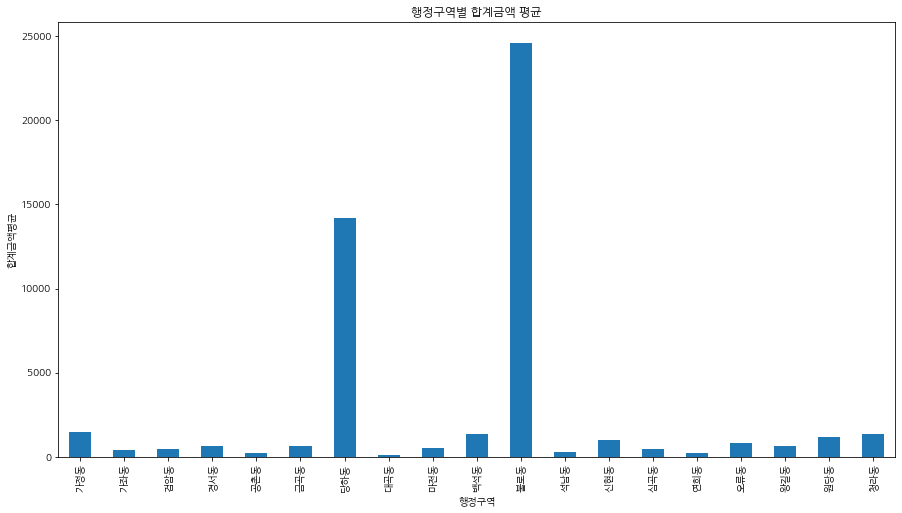

In [22]:
# 6번 두번째 결과
dfmean.plot(kind = "bar", x="행정구역", figsize=(15,8))
plt.title("행정구역별 합계금액 평균")
plt.xlabel("행정구역")
plt.ylabel("합계금액평균")
plt.show